# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [4]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == "Male"]
female_df =  data.loc[data['Gender'] == "Female"]

print('Male Height mean: ', male_df.Height.mean())
print('Male Height sd: ', male_df.Height.std())

print('Male Weight mean: ', male_df.Weight.mean())
print('Male Weight sd: ', male_df.Weight.std())

print('Female Height mean: ', female_df.Height.mean())
print('Female Height sd: ', female_df.Height.std())

print('Female Weight mean: ', female_df.Weight.mean())
print('Female Weight sd: ', female_df.Weight.std())
  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621737
Male Height sd:  2.8633622286606517
Male Weight mean:  187.0206206581929
Male Weight sd:  19.781154516763813
Female Height mean:  63.708773603424916
Female Height sd:  2.696284015765056
Female Weight mean:  135.8600930074687
Female Weight sd:  19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

C:\Users\lizak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


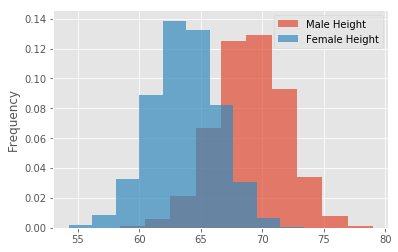

In [5]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Male Height')
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Height')
plt.legend()
plt.show()

In [6]:
# Record your observations - are these inline with your personal observations?
# Both Male and Female Heights are normally distributed
# Men are generally taller than women
# The most frequent overlap of Male & Female Heights are betw 65-67 inches (5'4")
# The spread of Male Heights is slightly larger than Female Heights
# The peak Female Height is lower than the peak Male Height, 
# but the probablility of the peak female height is greater than the peak male height


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

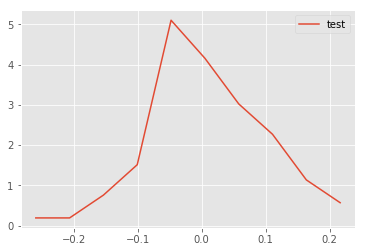

In [8]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    
    # Initialize numpy arrays according to number of bins with zeros to store interpolated values (from 1-09-10 the
    # Probability Density Function)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

C:\Users\lizak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


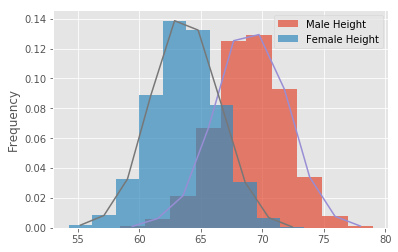

In [9]:
male_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Male Height')
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Height')
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

#### Repeat above exerice for male and female weights

C:\Users\lizak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


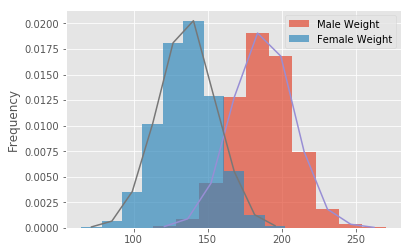

In [10]:
male_df.Weight.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Male Weight')
female_df.Weight.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Weight')
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

#### Write your observations in the cell below.

In [ ]:
# Record your observations - are these inline with your personal observations?
# Most women are between 130-140 lbs
# Most men are about 180 lbs
# The spread of weight amongst males is a bit wider than females
# Males generally weigh more than females
# Males and Females common weight is about 160 lbs

# So whats the takeaway when comparing male and female heights and weights 
# The most frequent overlap seems more in line with weight than height



#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


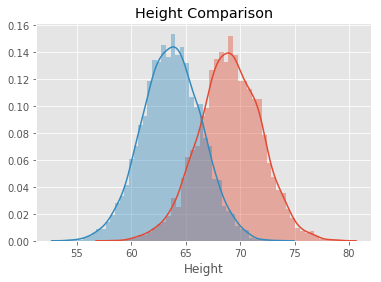

In [11]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Height Comparison')
plt.show()

C:\Users\lizak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


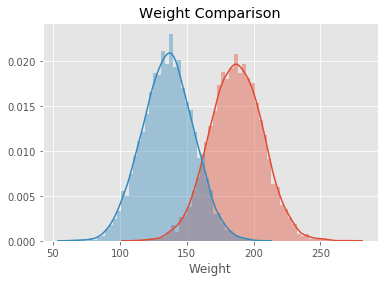

In [12]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Weight Comparison')
plt.show()

In [ ]:
# Your comments on the two approaches here. 

# Coding is cleaner - less with seaborn
# Visualization is easier for looking at the overlaps between male and female heights and weights

# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.